# **Regresión**

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score

In [95]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## **Datos**

In [11]:
df = pd.read_csv('Datos/housing.csv')

In [31]:
wf = df.dropna()

In [32]:
X = wf.drop('MEDV', axis=1)
y = wf['MEDV']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## **Regresión Lineal**

In [82]:
regLin = LinearRegression()
regLin.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = regLin.predict(X_test)

In [84]:
print(f'La presición del modelo es de: {round(regLin.score(X_test, y_test),2)*100}%')

La presición del modelo es de: 84.0%


## **Cross Validation**

In [85]:
cv_results = cross_val_score(regLin, X, y, cv=5)

In [86]:
np.mean(cv_results), np.median(cv_results)

(0.3839530761206411, 0.5857182044566904)

## **Ridge Regression**

In [90]:
regRidge = Ridge(alpha=0.1)

In [91]:
regRidge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [92]:
ridgePred = regRidge.predict(X_test)

In [94]:
regRidge.score(X_test, y_test)

0.8436705452472808

## **Lasso Regression**

In [96]:
regLasso = Lasso(alpha=0.1)

In [97]:
regLasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [98]:
lassoPred = regLasso.predict(X_test)

In [99]:
regLasso.score(X_test, y_test)

0.8350194361647676

In [104]:
names = X.columns

In [106]:
regLasso.coef_

array([-0.09774976,  0.05948909, -0.03997593,  1.67592802, -0.        ,
        3.66785848, -0.02120875, -1.22641409,  0.243828  , -0.01623073,
       -0.77507538,  0.00988323, -0.45988563])

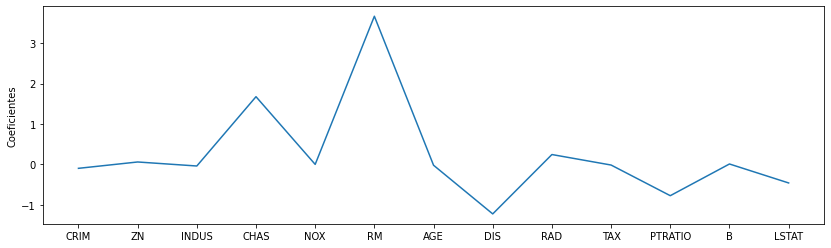

In [114]:
fig, ax = plt.subplots(figsize=(14, 4))

plt.plot(range(len(names)), regLasso.coef_)

plt.xticks(range(len(names)), names)
plt.ylabel('Coeficientes')

plt.show()